# 疑似R2乗値

GLMでは通常のR2乗値は使えないため、疑似R2乗値（pseudo R-squared）というものが使われる

## 疑似R2の種類

:::{admonition} McFaddenの疑似$R^2$
:class: info

$$
R^2_{\text{McF}} = 1 - \frac{ \ln(L) }{ \ln(L_{\text{null}}) }
$$

- $L$：評価対象のmodelの尤度
- $L_{\text{null}}$：null model（パスを何も引かないモデル）の尤度
:::

McFaddenの疑似$R^2$は離散変数にのみ使える

:::{admonition} Cox-Snellの疑似$R^2$
:class: info

$$
\begin{aligned}
R^2_{\text{CS}}
&= 1 - \left( \frac{L_{\text{null}}}{L} \right)^{2 / n_{\text{obs}}}\\
&= 1 - \exp \left(
\frac{2}{n_{\text{obs}}} \big( \ln(L_{\text{null}}) - \ln(L) \big)
\right)
\end{aligned}
$$

- $L$：評価対象のmodelの尤度
- $L_{\text{null}}$：null model（パスを何も引かないモデル）の尤度
:::

Cox-Snellの疑似$R^2$は離散変数と連続変数の両方に使える

## 例

In [27]:
import statsmodels.api as sm

data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)
model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())
result = model.fit(cov_type="HC1")
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:           InversePower   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Mon, 30 Sep 2024   Deviance:                     0.087389
Time:                        02:19:33   Pearson chi2:                   0.0860
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9800
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0178      0

/usr/local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


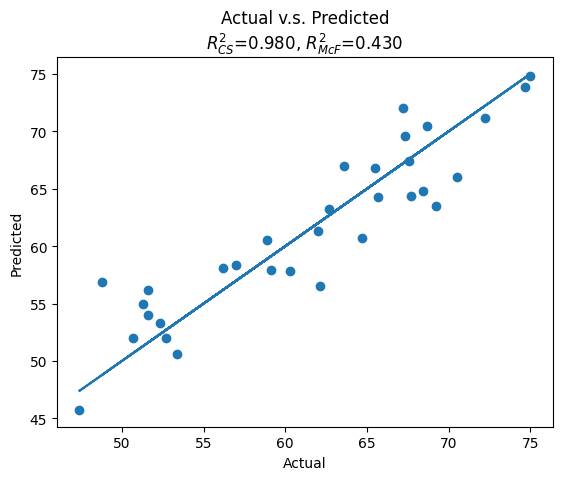

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_train = data.endog
y_pred = result.predict(data.exog)
ax.scatter(y_train, y_pred)
ax.plot(y_train, y_train)

r2_cs = result.pseudo_rsquared(kind="cs")
r2_mcf = result.pseudo_rsquared(kind="mcf")
ax.set(xlabel="Actual", ylabel="Predicted",
       title="Actual v.s. Predicted\n" + r"$R^2_{CS}$=" + f"{r2_cs:.3f}" + r", $R^2_{McF}$=" + f"{r2_mcf:.3f}")
fig.show()

## 参考

- [Pseudo-R-squared - Wikipedia](https://en.wikipedia.org/wiki/Pseudo-R-squared)